In [1]:
#importing the required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('HI-Small_Trans.csv')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming `df` is your DataFrame
# Use only the relevant numeric columns for training the models
numeric_columns = ['Amount Received', 'Amount Paid']

# Extract features (X) and target variable (y)
X = df[numeric_columns]
y = df['Is Laundering']

# Check if 'Is Laundering' column is not numeric and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = pd.to_numeric(y, errors='coerce')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier with Reduced Estimators
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.4f}')


Random Forest Classifier Accuracy: 0.9989


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming `df` is your DataFrame
numeric_columns = ['Amount Received', 'Amount Paid']

# Extract features (X) and target variable (y)
X = df[numeric_columns]
y = df['Is Laundering']

# Check if 'Is Laundering' column is not numeric and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = pd.to_numeric(y, errors='coerce')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier with Reduced Estimators
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf.predict(X_test_scaled)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.4f}')

# Precision
precision = precision_score(y_test, rf_pred)
print(f'Random Forest Classifier Precision: {precision:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:')
print(conf_matrix)



Random Forest Classifier Accuracy: 0.9962
Random Forest Classifier Precision: 0.0014
Confusion Matrix:
[[1011755    2827]
 [   1083       4]]


In [5]:
from sklearn.metrics import precision_score

# Assuming rf_pred contains the predicted labels for the test set

precision = precision_score(y_test, rf_pred)
print(f'Random Forest Classifier Precision: {precision:.4f}')


Random Forest Classifier Precision: 0.0014


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

# Assuming `df` is your DataFrame
numeric_columns = ['Amount Received', 'Amount Paid']

# Extract features (X) and target variable (y)
X = df[numeric_columns]
y = df['Is Laundering']

# Check if 'Is Laundering' column is not numeric and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = pd.to_numeric(y, errors='coerce')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier with Reduced Estimators
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf.predict(X_test_scaled)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.4f}')

# Precision
precision = precision_score(y_test, rf_pred)
print(f'Random Forest Classifier Precision: {precision:.4f}')

# F1 Score
f1 = f1_score(y_test, rf_pred)
print(f'Random Forest Classifier F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:')
print(conf_matrix)



Random Forest Classifier Accuracy: 0.9962
Random Forest Classifier Precision: 0.0014
Random Forest Classifier F1 Score: 0.0020
Confusion Matrix:
[[1011755    2827]
 [   1083       4]]


Random Forest Classifier AUC: 0.4914


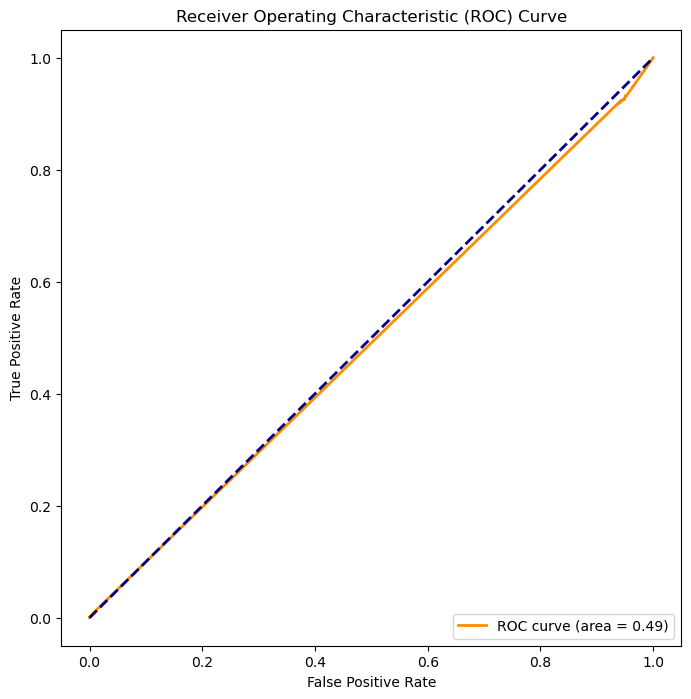

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming rf_pred contains the predicted labels for the test set
# Assuming rf.predict_proba(X_test_scaled)[:, 1] contains the predicted probabilities for the positive class

# Calculate AUC
auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print(f'Random Forest Classifier AUC: {auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Assuming `df` is your DataFrame
numeric_columns = ['Amount Received', 'Amount Paid']

# Extract features (X) and target variable (y)
X = df[numeric_columns]
y = df['Is Laundering']

# Check if 'Is Laundering' column is not numeric and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = pd.to_numeric(y, errors='coerce')

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_scaled, y_train)

# Predictions
dt_pred = dt.predict(X_test_scaled)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Classifier Accuracy: {dt_accuracy:.4f}')

# Precision
dt_precision = precision_score(y_test, dt_pred)
print(f'Decision Tree Classifier Precision: {dt_precision:.4f}')

# F1 Score
dt_f1 = f1_score(y_test, dt_pred)
print(f'Decision Tree Classifier F1 Score: {dt_f1:.4f}')

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print('Confusion Matrix:')
print(dt_conf_matrix)


Decision Tree Classifier Accuracy: 0.9910
Decision Tree Classifier Precision: 0.0015
Decision Tree Classifier F1 Score: 0.0026
Confusion Matrix:
[[1006500    8082]
 [   1075      12]]


Decision Tree Classifier AUC: 0.4925


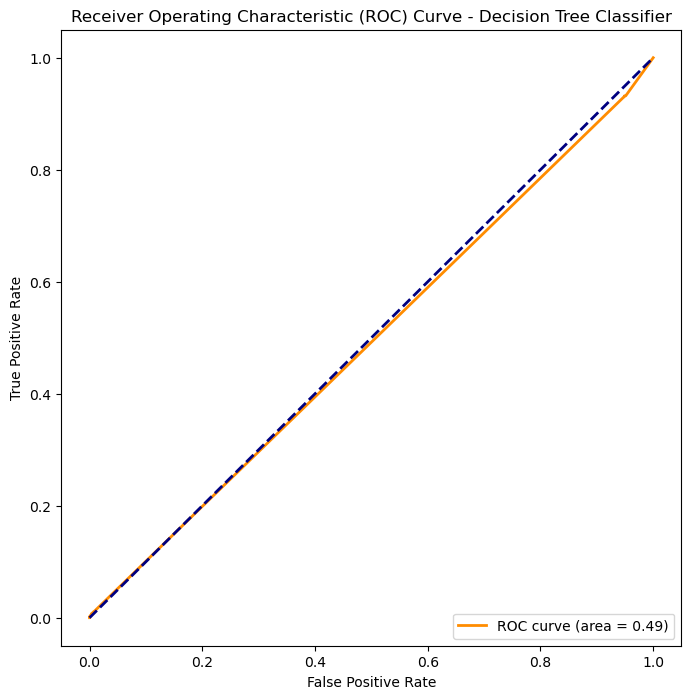

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming dt_pred contains the predicted labels for the test set
# Assuming dt.predict_proba(X_test_scaled)[:, 1] contains the predicted probabilities for the positive class

# Calculate AUC for Decision Tree
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])
print(f'Decision Tree Classifier AUC: {dt_auc:.4f}')

# Plot ROC curve for Decision Tree
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 8))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(dt_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()
